<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Αναστάσιος Παπαζαφειρόπουλος, 03118079  <h3>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
from networkx.algorithms import community as cmt
import time
import warnings
warnings.simplefilter("ignore", UserWarning)
from datetime import datetime 

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n, d, p, seed=seedno)
RGER = nx.gnm_random_graph(n, M, seed=seedno)
RGG = nx.random_geometric_graph(n, R, seed=seedno) 
SF = nx.barabasi_albert_graph(n, d, seed=seedno) 
SW = nx.watts_strogatz_graph(n, k, p, seed=seedno)  

print('Checking if graphs are connected:\n')
print('REG \tconnected: ' + str(nx.is_connected(REG)))
print('RGER \tconnected: ' + str(nx.is_connected(RGER)))
print('RGG \tconnected: ' + str(nx.is_connected(RGG)))
print('SF \tconnected: ' + str(nx.is_connected(SF)))
print('SW \tconnected: ' + str(nx.is_connected(SW)))

Checking if graphs are connected:

REG 	connected: True
RGER 	connected: True
RGG 	connected: True
SF 	connected: True
SW 	connected: True


<h4>Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

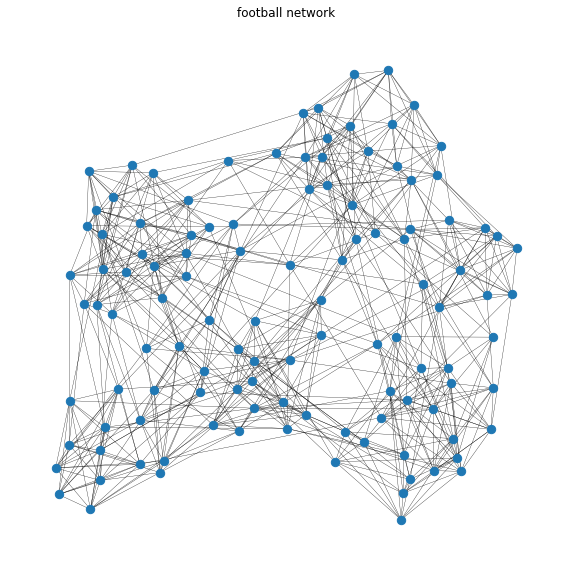

In [3]:
#football network
football=nx.read_gml(r"football.gml")

plt.figure(figsize=(10,10))
plt.title('football network')
nx.draw(football, node_size=70, width=0.3)

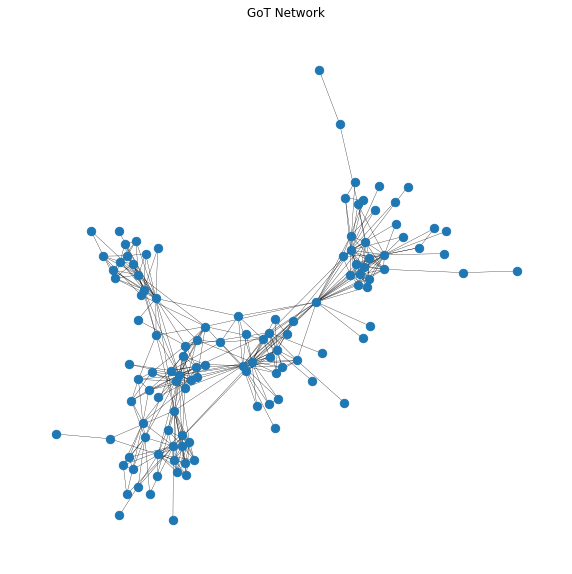

In [4]:
#GοΤ network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1
        
plt.figure(figsize=(10,10))
plt.title('GοT Network')
nx.draw(got, node_size=70, width=0.3)

#### Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

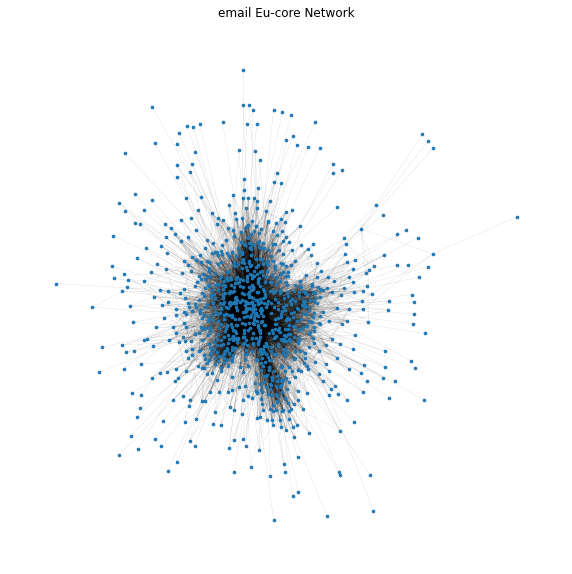

In [5]:
#email-Eu-core network
eu0=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

components_sorted = sorted(nx.connected_components(eu0), key=len, reverse=True)
eu = nx.Graph(nx.subgraph(eu0, components_sorted[0]))

#remove self-loops from connected graph

selfloops = nx.selfloop_edges(eu)
eu.remove_edges_from(selfloops)


plt.figure(figsize=(10,10))
plt.title('email Eu-core Network')
nx.draw_spring(eu, node_size=7, width=0.05, edge_color='black')

<h4>Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

In [6]:
# return degree centrality histogram for graph G
def deg(G):
    degrees = nx.degree_centrality(G)
    deg_values = []
    for n in degrees:
        deg_values.append(degrees[n])

    fig, ax = plt.subplots()
    _ = ax.hist(deg_values)
    plt.title("Degree centrality histogram")
    plt.ylabel("Nodes")
    plt.xlabel("Degree centrality")
    plt.show()
    
    print("Mean: {:.3f}".format(np.mean(deg_values)))
    print("Standard deviation: {:.3f}".format(np.std(deg_values)))

REG:


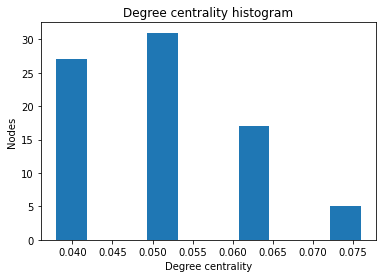

Mean: 0.051
Standard deviation: 0.011

RGER:


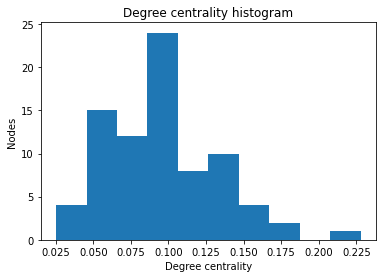

Mean: 0.095
Standard deviation: 0.036

RGG:


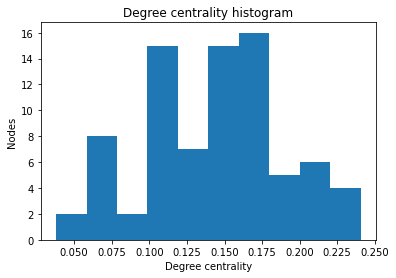

Mean: 0.142
Standard deviation: 0.047

SF:


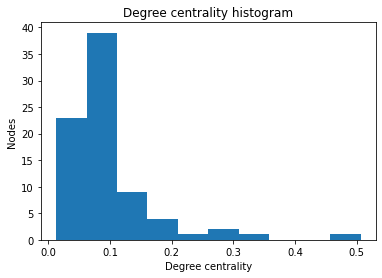

Mean: 0.096
Standard deviation: 0.073

SW:


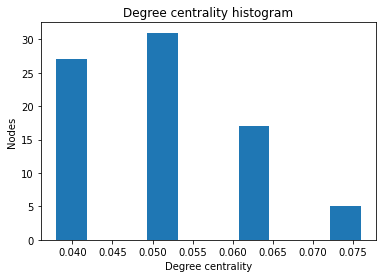

Mean: 0.051
Standard deviation: 0.011

football:


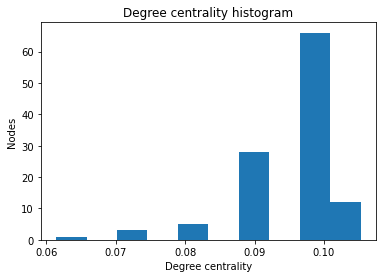

Mean: 0.094
Standard deviation: 0.008

Game of Thrones:


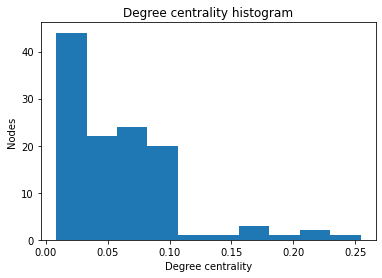

Mean: 0.056
Standard deviation: 0.047

Email Eu Core:


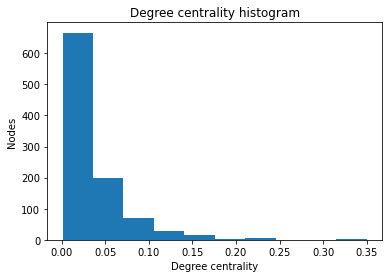

Mean: 0.033
Standard deviation: 0.038


In [7]:
print("REG:")
deg(REG)
print()
print("RGER:")
deg(RGER)
print()
print("RGG:")
deg(RGG)
print()
print("SF:")
deg(SF)
print()
print("SW:")
deg(SW)
print()
print("football:")
deg(football)
print()
print("Game of Thrones:")
deg(got)
print()
print("Email Eu Core:")
deg(eu)

#### Σχόλια - Παρατηρήσεις:

- Για το δίκτυο football παρατηρούμε πως η μέση τιμή είναι σχετικά υψυλή και πολύ κοντά σε αυτή του σύνθετου δικτύου RGG. Ωστόσο η διασπορά είναι σημαντικά μικρότερη από αυτή του RGG και επίσης η καμπύλη κατανομής δεν φαίνεται να τείνει προς την uniform, όπως γίνεται στο RGG.  
- To δίκτυο του GοT φαίνεται να έχει πολύ κοντινές τιμές mean και variance σε αυτές του συνθετικού δικτύου Scale-Free. Επίσης η καμπύλη κατανομής φαίνεται να είναι τύπου power-law όπως συμβαίνει και στο συνθετικό δίκτυο SF
- Το δίκτυο Email Eu core φαίνεται να τείνει και αυτό προς την τοπολογία του συνθετικού δικτύου SF. 

<h4>Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

In [8]:
def cluster(G):
    node_clusters = nx.clustering(G)

    clustering_vals = []
    for node in node_clusters:
        clustering_vals.append(node_clusters[node])
      
    plt.hist(clustering_vals)
    plt.title("Clustering coefficients histogram")
    plt.xlabel("Clustering coefficient")
    plt.ylabel("Number of nodes")
    plt.show()

    mean = np.mean(clustering_vals)
    print("Mean: {:.3f}".format(mean))
    std = np.std(clustering_vals)
    print("Standard deviation: {:.3f}".format(std))

REG:


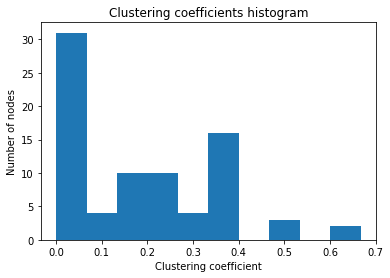

Mean: 0.167
Standard deviation: 0.168

RGER:


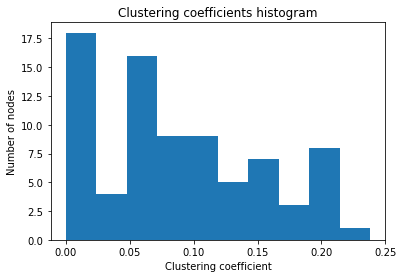

Mean: 0.085
Standard deviation: 0.065

RGG:


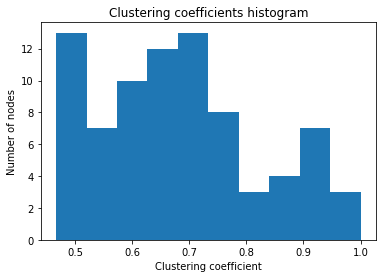

Mean: 0.683
Standard deviation: 0.144

SF:


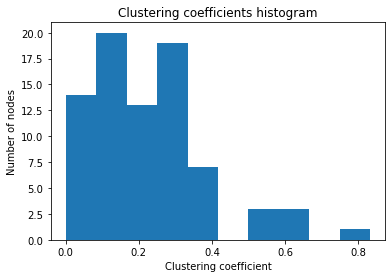

Mean: 0.229
Standard deviation: 0.170

SW:


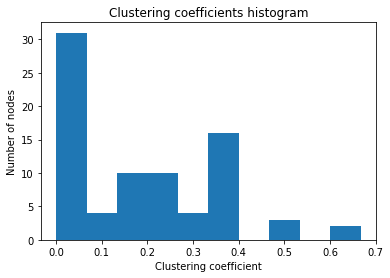

Mean: 0.167
Standard deviation: 0.168

football:


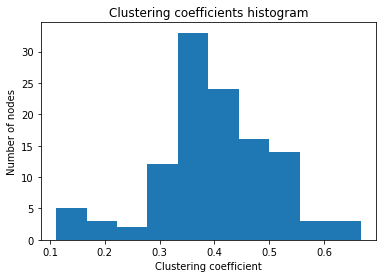

Mean: 0.403
Standard deviation: 0.104

Game of Thrones:


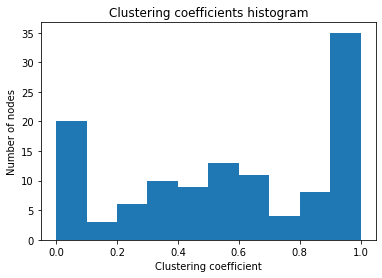

Mean: 0.574
Standard deviation: 0.355

Email Eu Core:


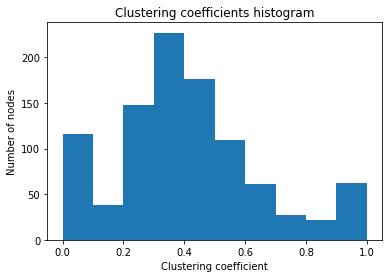

Mean: 0.407
Standard deviation: 0.248


In [9]:
print("REG:")
cluster(REG)
print()
print("RGER:")
cluster(RGER)
print()
print("RGG:")
cluster(RGG)
print()
print("SF:")
cluster(SF)
print()
print("SW:")
cluster(SW)
print()
print("football:")
cluster(football)
print()
print("Game of Thrones:")
cluster(got)
print()
print("Email Eu Core:")
cluster(eu)

#### Σχόλια - Παρατηρήσεις:
- Για το δίκτυο football παρατηρούμε πως η μέση τιμή είναι σχετικά υψυλή και πολύ κοντά σε αυτή του σύνθετου δικτύου RGG. Επίσης η διασπορά έχει λογική και παρόμοια τιμή με αυτή του RGG.
- Για το δίκτυο του GoT έχουμε κατανομή που αυτή την φορά δεν μοιάζει με αυτή του SF. Παρατηρούμε πως οι περισσότεροι κόμβοι του δικτύου έχουν μέγιστο συντελεστή ομαδοποίησης. Επίσης, έχει τις μεγαλύτερες τιμές mean και variance μεταξύ των πραγματικών δικτύων. 
- Για το δίκτυο Email Eu core παρατηρούμε πως η κατανομή καθώς και οι τιμές μοιάζουν με του δικτύου RGG. 

<h4>Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες </h4>

In [10]:
def close(G):
    closeness = nx.closeness_centrality(G)
    cns_values = []
    for n in closeness:
        cns_values.append(closeness[n])

    fig, ax = plt.subplots()
    _ = ax.hist(cns_values)
    plt.title("Closeness centrality histogram")
    plt.xlabel("Closeness centrality")
    plt.ylabel("Nodes")
    plt.show()
    
    print("Mean: {:.3f}".format(np.mean(cns_values)))
    print("Standard deviation: {:.3f}".format(np.std(cns_values)))


REG:


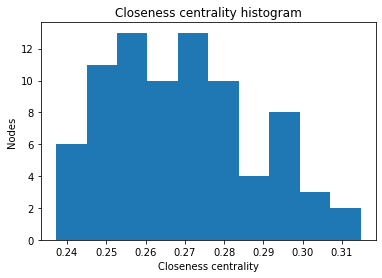

Mean: 0.269
Standard deviation: 0.018

RGER:


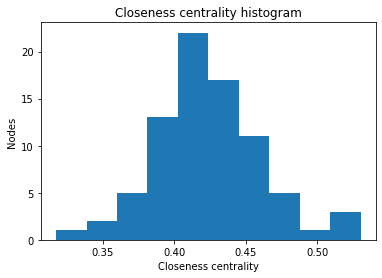

Mean: 0.424
Standard deviation: 0.037

RGG:


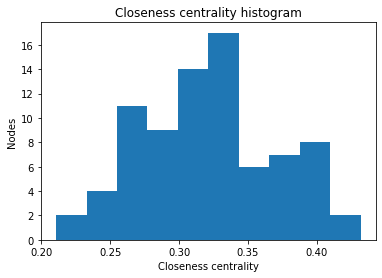

Mean: 0.320
Standard deviation: 0.049

SF:


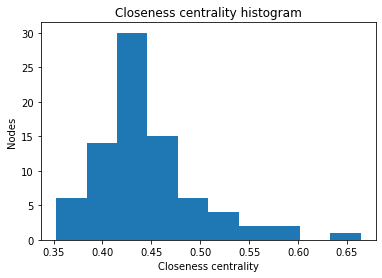

Mean: 0.446
Standard deviation: 0.052

SW:


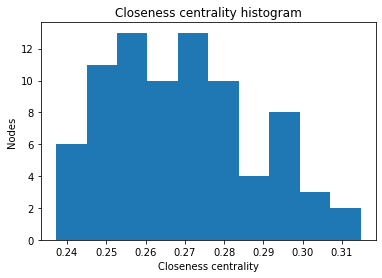

Mean: 0.269
Standard deviation: 0.018

football:


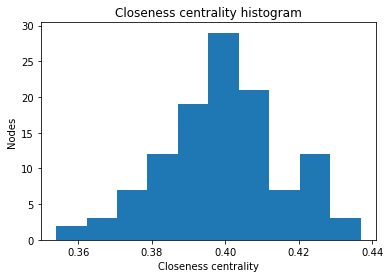

Mean: 0.399
Standard deviation: 0.016

Game of Thrones:


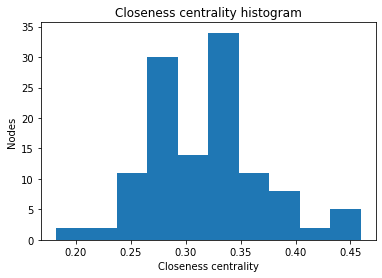

Mean: 0.319
Standard deviation: 0.052

Email Eu Core:


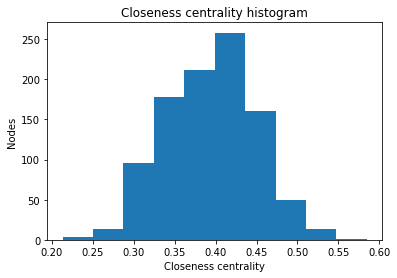

Mean: 0.394
Standard deviation: 0.055


In [11]:
print("REG:")
close(REG)
print()
print("RGER:")
close(RGER)
print()
print("RGG:")
close(RGG)
print()
print("SF:")
close(SF)
print()
print("SW:")
close(SW)
print()
print("football:")
close(football)
print()
print("Game of Thrones:")
close(got)
print()
print("Email Eu Core:")
close(eu)

#### Σχόλια - Παρατηρήσεις:
- Για το πραγματικό δίκτυο football έχει παρόμοια κατανομή με αυτή του RGER και RGG. Ωστόσο η μέση τιμή και η διασπορά τείνουν περισσότερο σε αυτές του RGER.
- Για το δίκτυο του GoT έχουμε κατανομή που μοιάζει με αυτή του RGG. Ωστόσο οι τιμές, εκτός από το RGG, μοιάζουν και με αυτές του SF συνθετικού δικτύου.
- Για το δίκτυο Email Eu Core έχουμε κατανομή και τιμές που μοιάζουν στο συνθετικό δίκτυο SF. 

#### Χαρακτηρισμός Τύπου Πραγματικών Δικτύων

Με βάση τις παραπάνω συγκρίσεις φαίνεται πως:
- Το δίκτυο football τείνει προς τον τύπο του τυχαίου γεωμετρικού γράφου.
- Το δίκτυο GοT τείνει προς τον τύπο του Scale-Free γράφου.
- Το δίκτυο Email Eu Core τείνει προς τον τύπο του Scale-Free γράφου.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [12]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικ΄ές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

In [13]:
nfootball, football_maping = conv2int(football, 0)
ngot, got_mapping = conv2int(got, 0)
neu, eu_mapping = conv2int(eu, 0)

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [14]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())
colors.remove('antiquewhite')
colors.remove('floralwhite')
colors.remove('ghostwhite')
colors.remove('navajowhite')
colors.remove('white')
colors.remove('whitesmoke')
colors.remove('aliceblue')
colors.remove('w')

def random_color():
    hexadecimal = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
    return hexadecimal

In [15]:
timestamps={}

#load graphs from local memory
%store -r REG_ng_mod
%store -r REG_ng_perf
%store -r RGER_ng_mod
%store -r RGER_ng_perf
%store -r RGG_ng_mod
%store -r RGG_ng_perf
%store -r SF_ng_mod
%store -r SF_ng_perf
%store -r SW_ng_mod
%store -r SW_ng_perf
%store -r football_ng_mod
%store -r football_ng_perf
%store -r got_ng_mod
%store -r got_ng_perf
%store -r eu1_ng_mod
%store -r eu1_ng_perf

%store -r REG_sc_mod
%store -r REG_sc_perf
%store -r RGER_sc_mod
%store -r RGER_sc_perf
%store -r RGG_sc_mod
%store -r RGG_sc_perf
%store -r SF_sc_mod
%store -r SF_sc_perf
%store -r SW_sc_mod
%store -r SW_sc_perf
%store -r football_sc_mod
%store -r football_sc_perf
%store -r got_sc_mod
%store -r got_sc_perf
%store -r eu1_sc_mod
%store -r eu1_sc_perf

%store -r timestamps

no stored variable or alias eu1_ng_mod
no stored variable or alias eu1_ng_perf
no stored variable or alias REG_sc_mod
no stored variable or alias REG_sc_perf
no stored variable or alias RGER_sc_mod
no stored variable or alias RGER_sc_perf
no stored variable or alias RGG_sc_mod
no stored variable or alias RGG_sc_perf
no stored variable or alias SF_sc_mod
no stored variable or alias SF_sc_perf
no stored variable or alias SW_sc_mod
no stored variable or alias SW_sc_perf
no stored variable or alias football_sc_mod
no stored variable or alias football_sc_perf
no stored variable or alias got_sc_mod
no stored variable or alias got_sc_perf
no stored variable or alias eu1_sc_mod
no stored variable or alias eu1_sc_perf


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>
<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan. Ελέγξτε τις διαμερίσεις που έχουν μέχρι και 50 κοινότητες.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [16]:
def ng(G):
    iterator = cmt.girvan_newman(G)
    level = []
    best_mod = -1
    best_perf = -1
    partition_mod = None
    partition_perf = None
    for partition in iterator:
        if (len(partition)>50):
            break
        else: 
            mod = cmt.modularity(G, partition)
            perf = cmt.partition_quality(G, partition)[1]
            if(mod > best_mod):
                partition_mod = partition
                best_mod = mod        
            if(perf > best_perf):
                partition_perf = partition
                best_perf = perf      
    return (partition_mod, partition_perf)

In [17]:
(REG_ng_mod, REG_ng_perf) = ng(REG)
(RGER_ng_mod, RGER_ng_perf) = ng(RGER)
(RGG_ng_mod, RGG_ng_perf) = ng(RGG)
(SF_ng_mod, SF_ng_perf) = ng(SF)
(SW_ng_mod, SW_ng_perf) = ng(SW)

start_time = time.time()
(football_ng_mod, football_ng_perf) = ng(nfootball)
timestamps['football_ng\t'] = time.time()-start_time
print('football ok!')
start_time = time.time()
(got_ng_mod, got_ng_perf) = ng(ngot)
timestamps['got_ng\t\t'] = time.time()-start_time
print('got ok!')

print(datetime.now())

start_time = time.time()
(eu_ng_mod, eu_ng_perf) = ng(neu)
timestamps['eu_ng\t\t'] = time.time()-start_time
print('email ok!')

#save graphs to local memory 
%store REG_ng_mod
%store REG_ng_perf
%store RGER_ng_mod
%store RGER_ng_perf
%store RGG_ng_mod
%store RGG_ng_perf
%store SF_ng_mod
%store SF_ng_perf
%store SW_ng_mod
%store SW_ng_perf
%store football_ng_mod
%store football_ng_perf
%store got_ng_mod
%store got_ng_perf
%store eu_ng_mod
%store eu_ng_perf

football ok!
got ok!
2022-12-16 23:29:41.454376
email ok!
Stored 'REG_ng_mod' (tuple)
Stored 'REG_ng_perf' (tuple)
Stored 'RGER_ng_mod' (tuple)
Stored 'RGER_ng_perf' (tuple)
Stored 'RGG_ng_mod' (tuple)
Stored 'RGG_ng_perf' (tuple)
Stored 'SF_ng_mod' (tuple)
Stored 'SF_ng_perf' (tuple)
Stored 'SW_ng_mod' (tuple)
Stored 'SW_ng_perf' (tuple)
Stored 'football_ng_mod' (tuple)
Stored 'football_ng_perf' (tuple)
Stored 'got_ng_mod' (tuple)
Stored 'got_ng_perf' (tuple)
Stored 'eu_ng_mod' (tuple)
Stored 'eu_ng_perf' (tuple)


<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering. </h4>
Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,50 Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

In [18]:
def sc(G, solver=None):
    k = len(G)
    adj_mat = nx.to_numpy_matrix(G)
    best_mod = -1
    best_perf = -1
    partition_mod = None
    partition_perf = None
    for i in range(2, k):
        np.random.seed(1)
        sc = SpectralClustering(i, eigen_solver=solver, random_state=np.random.RandomState(), 
                                affinity='nearest_neighbors', n_jobs=-1)
        sc.fit(adj_mat)
        ar = np.arange(len(sc.labels_))
        partition = []
        for j in range(0, i):
            partition.append(set(ar[sc.labels_==j]))
        mod = cmt.modularity(G, partition)
        perf = cmt.partition_quality(G, partition)[1]
        if(mod > best_mod):
            partition_mod = partition
            best_mod = mod        
        if(perf > best_perf):
            partition_perf = partition
            best_perf = perf     
    return (partition_mod, partition_perf)

In [19]:
warnings.filterwarnings("ignore")
(REG_sc_mod, REG_sc_perf) = sc(REG)
print('REG ok!')
(RGER_sc_mod, RGER_sc_perf) = sc(RGER)
print('RGER ok!')
(RGG_sc_mod, RGG_sc_perf) = sc(RGG)
print('RGG ok!')
(SF_sc_mod, SF_sc_perf) = sc(SF)
print('SF ok!')
(SW_sc_mod, SW_sc_perf) = sc(SW)
print('SW ok!')

start_time = time.time()
(football_sc_mod, football_sc_perf) = sc(nfootball)
timestamps['football_sc\t'] = time.time()-start_time
print("football ok!")
start_time = time.time()
(got_sc_mod, got_sc_perf) = sc(ngot)
timestamps['got_sc\t\t'] = time.time()-start_time
print("got ok!")

print(datetime.now())

start_time = time.time()
(eu_sc_mod, eu_sc_perf) = sc(neu, 'amg')
timestamps['eu_sc\t\t'] = time.time()-start_time
print("email ok!")

#save graphs to local memory in order to not rerun it 
%store REG_sc_mod
%store REG_sc_perf
%store RGER_sc_mod
%store RGER_sc_perf
%store RGG_sc_mod
%store RGG_sc_perf
%store SF_sc_mod
%store SF_sc_perf
%store SW_sc_mod
%store SW_sc_perf
%store football_sc_mod
%store football_sc_perf
%store got_sc_mod
%store got_sc_perf
%store eu_sc_mod
%store eu_sc_perf

REG ok!
RGER ok!
RGG ok!
SF ok!
SW ok!
football ok!
got ok!
2022-12-16 23:38:51.487377


KeyboardInterrupt: 

<h4>Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>
Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.

In [20]:
REG_mm = cmt.greedy_modularity_communities(REG)
print('REG ok!')
RGER_mm = cmt.greedy_modularity_communities(RGER)
print('RGER ok!')
RGG_mm = cmt.greedy_modularity_communities(RGG)
print('RGG ok!')
SF_mm = cmt.greedy_modularity_communities(SF)
print('SF ok!')
SW_mm = cmt.greedy_modularity_communities(SW)
print('SW ok!')

start_time = time.time()
football_mm = cmt.greedy_modularity_communities(nfootball)
timestamps['football_mm\t'] = time.time()-start_time
print("football ok!")
start_time = time.time()
got_mm = cmt.greedy_modularity_communities(ngot)
timestamps['got_mm\t\t'] = time.time()-start_time
print("got ok!")
start_time = time.time()
eu_mm = cmt.greedy_modularity_communities(neu)
timestamps['eu_mm\t\t'] = time.time()-start_time
print("email ok!")

%store timestamps

REG ok!
RGER ok!
RGG ok!
SF ok!
SW ok!
football ok!
got ok!
email ok!
Stored 'timestamps' (dict)


#### Οπτικοποίηση:

In [21]:
def visualization(G, partition, netname, partname, scorename, pos, more_colors=0):
    plt.figure(figsize=(7,7))
    plt.title(netname + ' network communities - ' + partname + " - " + scorename)
    if(more_colors==0):
        for i in range (0,len(partition)):
            nx.draw_networkx_nodes(G, pos, nodelist = partition[i], node_size=100, 
                                   node_color=colors[i], edgecolors='black')
    else:
        for i in range (0,len(partition)):
            nx.draw_networkx_nodes(G, pos, nodelist = partition[i], node_size=100, 
                                   node_color=random_color(), edgecolors='black')
    nx.draw_networkx_edges(G, pos, width=0.4)
    plt.show()
    score = None
    score_mod = cmt.modularity(G, partition)
    score_perf = cmt.partition_quality(G, partition)[1]
    print('Network:\t\t' + netname)
    print('Partition Type:\t\t' + partname)
    if(scorename == 'Modularity'):
        print('\033[1m' + 'Modularity'+":\t\t" + str(score_mod))
        print('\033[0m' + 'Performance'+":\t\t" + str(score_perf))
    else:
        print('Modularity'+":\t\t" + str(score_mod))
        print('\033[1m' + 'Performance'+":\t\t" + str(score_perf))
    print('\033[0m' + 'Number of Communities:\t'+str(len(partition)))

#### Οπτικοποίηση κοινοτήτων American College Football

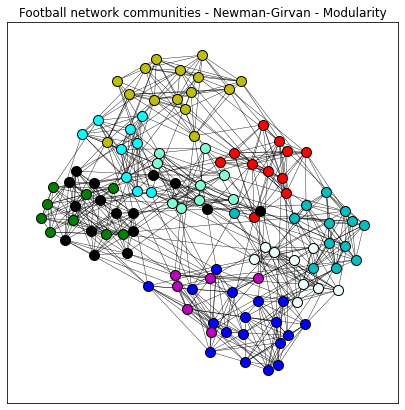

Network:		Football
Partition Type:		Newman-Girvan
Modularity:		0.5996290274077957
Performance:		0.9369946605644546
Number of Communities:	10
-----------------------------------------------------------------


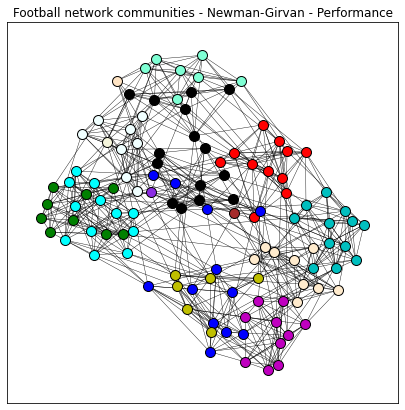

Network:		Football
Partition Type:		Newman-Girvan
Modularity:		0.5667857114344184
Performance:		0.9581998474446987
Number of Communities:	17


In [22]:
pos = nx.spring_layout(nfootball)
visualization(nfootball, football_ng_mod, 'Football', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(nfootball, football_ng_perf, 'Football', 'Newman-Girvan', 'Performance', pos)

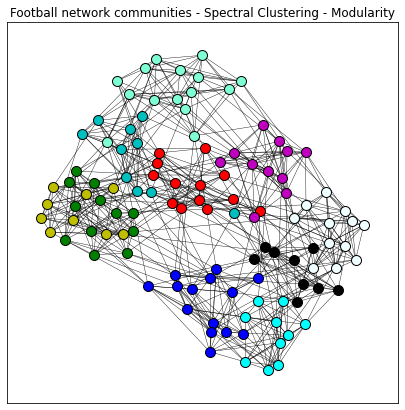

Network:		Football
Partition Type:		Spectral Clustering
Modularity:		0.6044285185845559
Performance:		0.9435545385202135
Number of Communities:	10
-----------------------------------------------------------------


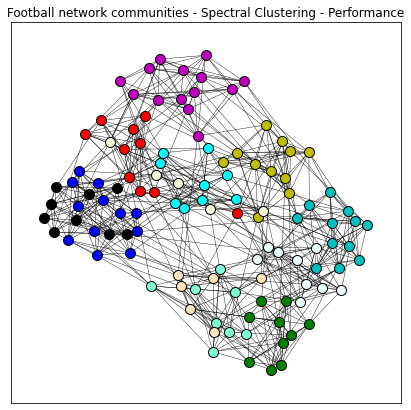

Network:		Football
Partition Type:		Spectral Clustering
Modularity:		0.6005165407471078
Performance:		0.9548436308161709
Number of Communities:	12


In [23]:
visualization(nfootball, football_sc_mod, 'Football', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(nfootball, football_sc_perf, 'Football', 'Spectral Clustering', 'Performance', pos)

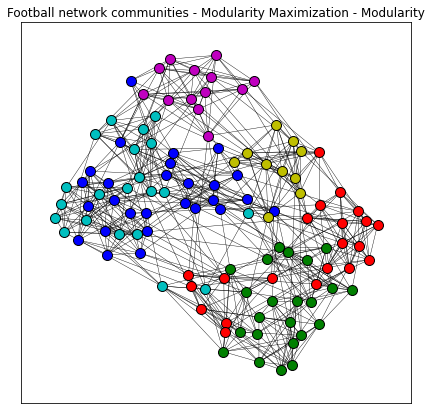

Network:		Football
Partition Type:		Modularity Maximization
Modularity:		0.5497406651426807
Performance:		0.8681922196796339
Number of Communities:	6


In [24]:
visualization(nfootball, football_mm, 'Football', 'Modularity Maximization', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων Game of Thrones

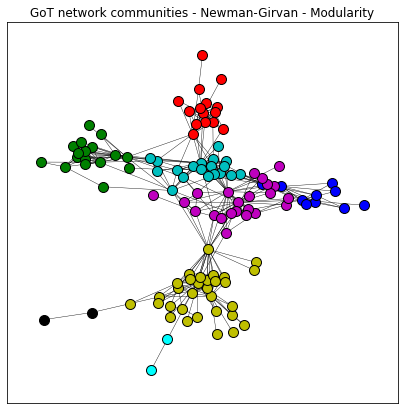

Network:		GoT
Partition Type:		Newman-Girvan
Modularity:		0.6681205999387817
Performance:		0.8722404215923658
Number of Communities:	8
-----------------------------------------------------------------


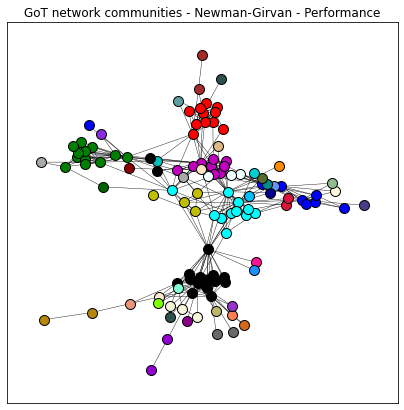

Network:		GoT
Partition Type:		Newman-Girvan
Modularity:		0.4838983267013573
Performance:		0.96425010682239
Number of Communities:	50


In [25]:
pos = nx.spring_layout(ngot)
visualization(ngot, got_ng_mod, 'GoT', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(ngot, got_ng_perf, 'GoT', 'Newman-Girvan', 'Performance', pos)

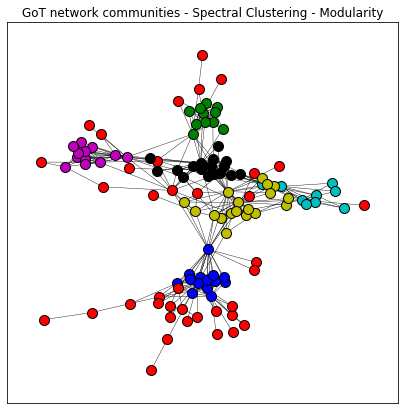

Network:		GoT
Partition Type:		Spectral Clustering
Modularity:		0.5636287113559841
Performance:		0.8481697763851304
Number of Communities:	7
-----------------------------------------------------------------


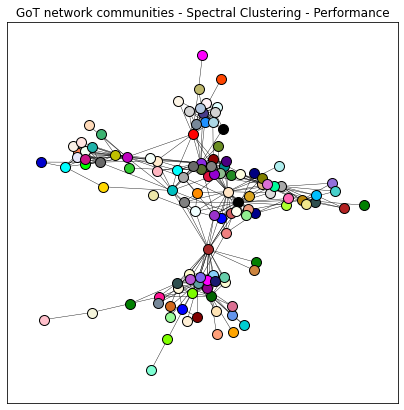

Network:		GoT
Partition Type:		Spectral Clustering
Modularity:		-0.01429701050913172
Performance:		0.9434553482409913
Number of Communities:	118


In [26]:
visualization(ngot, got_sc_mod, 'GoT', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(ngot, got_sc_perf, 'GoT', 'Spectral Clustering', 'Performance', pos)

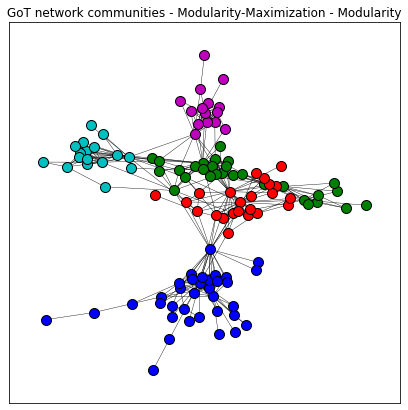

Network:		GoT
Partition Type:		Modularity-Maximization
Modularity:		0.660477884909703
Performance:		0.829796325309785
Number of Communities:	5


In [27]:
visualization(ngot, got_mm, 'GoT', 'Modularity-Maximization', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

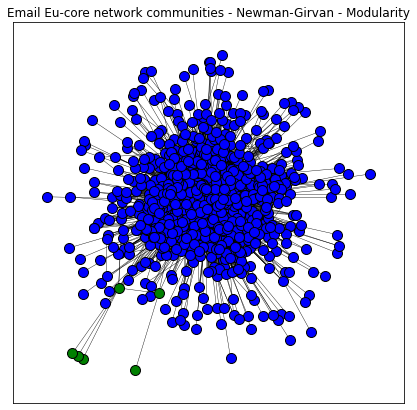

Network:		Email Eu-core
Partition Type:		Newman-Girvan
Modularity:		0.0006218821799455388
Performance:		0.04515604246249524
Number of Communities:	2
-----------------------------------------------------------------


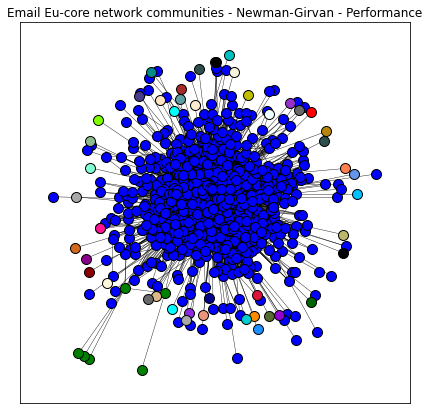

Network:		Email Eu-core
Partition Type:		Newman-Girvan
Modularity:		0.0006179294897104182
Performance:		0.13940548388093205
Number of Communities:	50


In [28]:
pos = nx.spring_layout(neu)
visualization(neu, eu_ng_mod, 'Email Eu-core', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(neu, eu_ng_perf, 'Email Eu-core', 'Newman-Girvan', 'Performance', pos)

In [29]:
visualization(neu, eu_sc_mod, 'Email Eu-core', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(neu, eu_sc_perf, 'Email Eu-core', 'Spectral Clustering', 'Performance', pos, 1)

NameError: name 'eu_sc_mod' is not defined

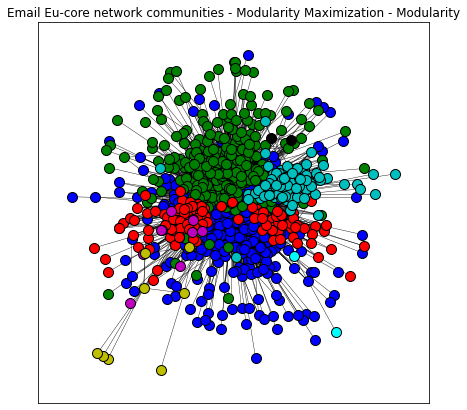

Network:		Email Eu-core
Partition Type:		Modularity Maximization
Modularity:		0.3471325650460906
Performance:		0.7078716240565892
Number of Communities:	8


In [30]:
visualization(neu, eu_mm, 'Email Eu-core', 'Modularity Maximization', 'Modularity', pos)

#### Οπτικοποίηση κοινοτήτων REG

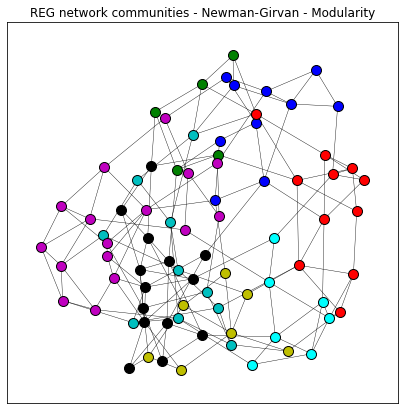

Network:		REG
Partition Type:		Newman-Girvan
Modularity:		0.5741015625
Performance:		0.8930379746835443
Number of Communities:	8
-----------------------------------------------------------------


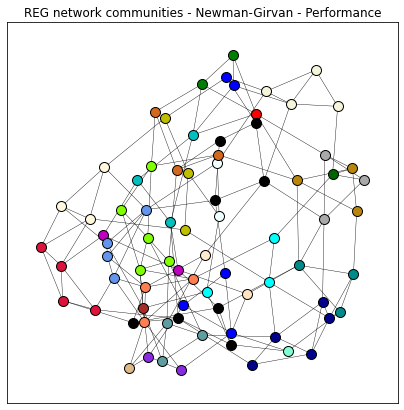

Network:		REG
Partition Type:		Newman-Girvan
Modularity:		0.4018749999999999
Performance:		0.9670886075949368
Number of Communities:	31


In [31]:
pos = nx.spring_layout(REG)
visualization(REG, REG_ng_mod, 'REG', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(REG, REG_ng_perf, 'REG', 'Newman-Girvan', 'Performance', pos)

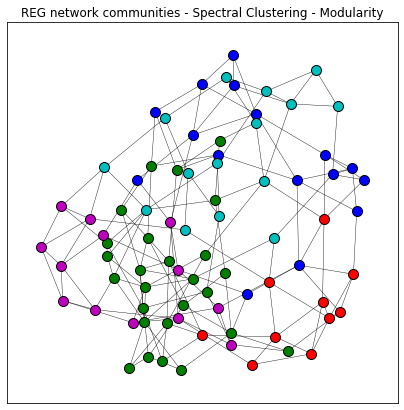

Network:		REG
Partition Type:		Spectral Clustering
Modularity:		0.49416015625
Performance:		0.8091772151898734
Number of Communities:	5
-----------------------------------------------------------------


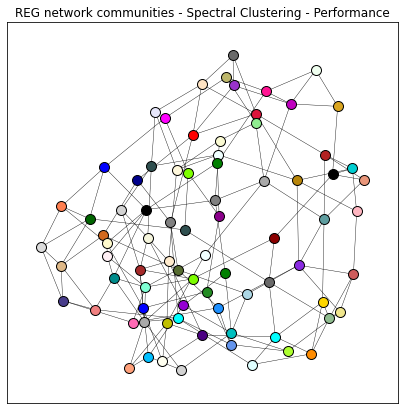

Network:		REG
Partition Type:		Spectral Clustering
Modularity:		-0.013300781250000001
Performance:		0.9490506329113924
Number of Communities:	79


In [32]:
visualization(REG, REG_sc_mod, 'REG', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(REG, REG_sc_perf, 'REG', 'Spectral Clustering', 'Performance', pos)

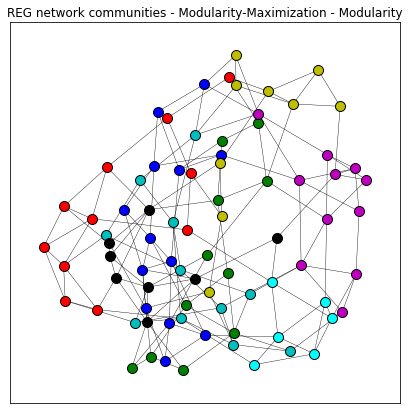

Network:		REG
Partition Type:		Modularity-Maximization
Modularity:		0.563203125
Performance:		0.9003164556962026
Number of Communities:	8


In [33]:
visualization(REG, REG_mm, 'REG', 'Modularity-Maximization', 'Modularity', pos)

##### Σχόλιο:
Παρατηρούμε πως για την τοπολογία REG ο διαχωρισμός των κοινοτήτων δίνει καλές επιδόσεις, ειδικά με την άπληστη μέθοδο Modularity-Maximization. Γενικά, όλοι οι αλγόριθμοι είχαν καλές επιδόσεις, εξαιτίας της σταθερής διάταξης και γεωγραφίας του γραφήματος. Αξίζει να σημειώθεί πως οι μέθοδοι NG και SC για καλύτερο perfomance, μπορεί μεν να επιτυγχάνουν πολύ καλό performance score, αλλά "επιτυγχάνουν" επίσης σημαντικά χαμηλό modularity και επομένως δεν φαίνεται εποπτικά να είναι αποτελεσματικοί.

#### Οπτικοποίηση κοινοτήτων RGER

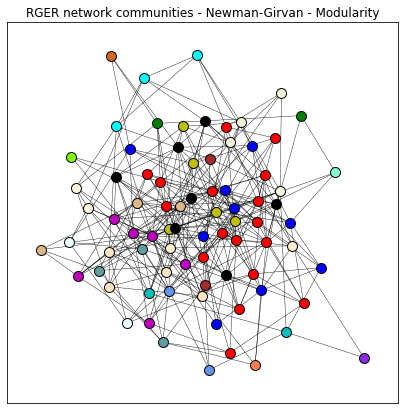

Network:		RGER
Partition Type:		Newman-Girvan
Modularity:		0.21109444444444445
Performance:		0.8949367088607595
Number of Communities:	24
-----------------------------------------------------------------


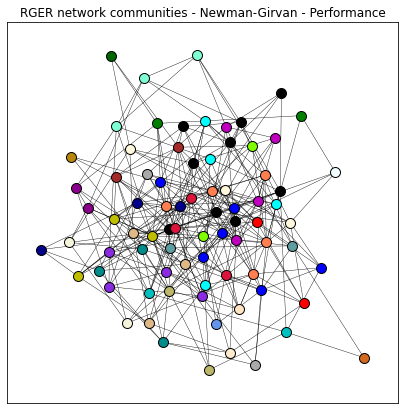

Network:		RGER
Partition Type:		Newman-Girvan
Modularity:		0.1681
Performance:		0.9215189873417722
Number of Communities:	34


In [34]:
pos = nx.spring_layout(RGER)
visualization(RGER, RGER_ng_mod, 'RGER', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(RGER, RGER_ng_perf, 'RGER', 'Newman-Girvan', 'Performance', pos)

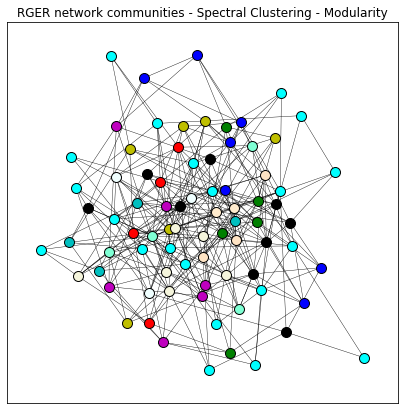

Network:		RGER
Partition Type:		Spectral Clustering
Modularity:		0.014100000000000005
Performance:		0.825632911392405
Number of Communities:	15
-----------------------------------------------------------------


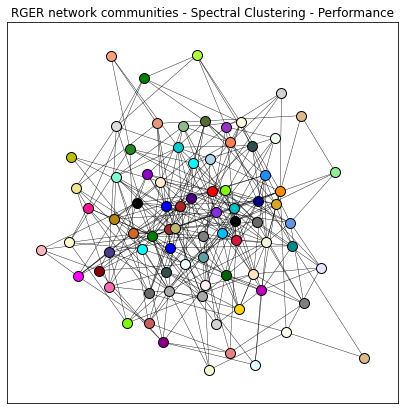

Network:		RGER
Partition Type:		Spectral Clustering
Modularity:		-0.014344444444444441
Performance:		0.904746835443038
Number of Communities:	79


In [35]:
visualization(RGER, RGER_sc_mod, 'RGER', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(RGER, RGER_sc_perf, 'RGER', 'Spectral Clustering', 'Performance', pos)

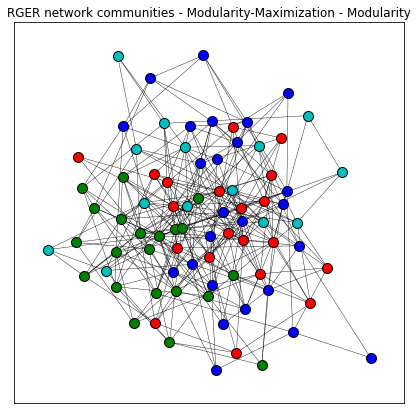

Network:		RGER
Partition Type:		Modularity-Maximization
Modularity:		0.28364999999999996
Performance:		0.7591772151898735
Number of Communities:	4


In [36]:
visualization(RGER, RGER_mm, 'RGER', 'Modularity-Maximization', 'Modularity', pos)

##### Σχόλιο:
Παρατηρούμε πως για την τοπολογία RGER, καμία από τις 3 μεθόδους δεν δίνει καλή απόδοση. Αυτό μπορούμε οφείλεται στον τελείως τυχαίο τρόπο που συνδέονται οι κόμβοι, με αποτέλεσμα να καθίσταται πολύ μικρή η πιθανότητα εύρεσης διακριτών κοινοτήτων στην συγκεκριμένη τοπολογία. Αξίζει, όμως, να σημειωθεί πως η άπληστη μέθοδος δίνει το πιο ικανοποιητικό και ανεκτό αποτέλεσμα σε σχέση με τις προηγούμενες.

#### Οπτικοποίηση κοινοτήτων RGG

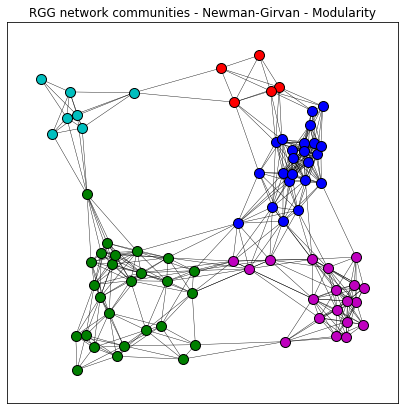

Network:		RGG
Partition Type:		Newman-Girvan
Modularity:		0.5970493827160495
Performance:		0.8639240506329114
Number of Communities:	5
-----------------------------------------------------------------


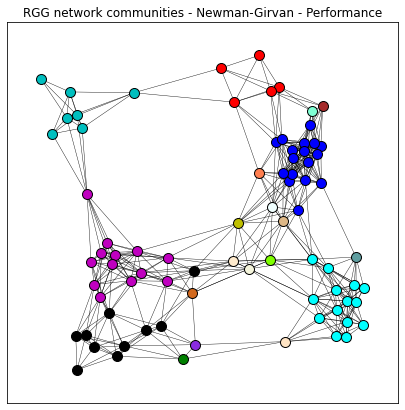

Network:		RGG
Partition Type:		Newman-Girvan
Modularity:		0.4893530864197531
Performance:		0.9291139240506329
Number of Communities:	22


In [37]:
pos = nx.spring_layout(RGG)
visualization(RGG, RGG_ng_mod, 'RGG', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(RGG, RGG_ng_perf, 'RGG', 'Newman-Girvan', 'Performance', pos)

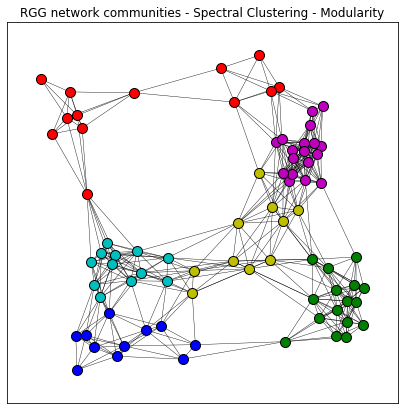

Network:		RGG
Partition Type:		Spectral Clustering
Modularity:		0.5937728395061729
Performance:		0.9186708860759494
Number of Communities:	6
-----------------------------------------------------------------


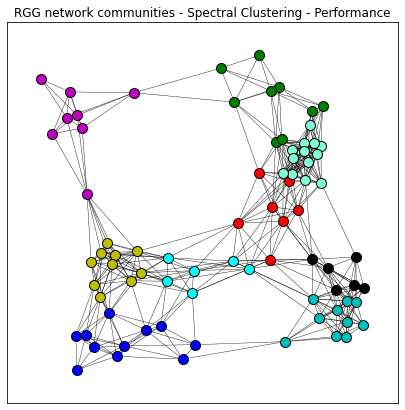

Network:		RGG
Partition Type:		Spectral Clustering
Modularity:		0.5088765432098766
Performance:		0.9329113924050633
Number of Communities:	9


In [38]:
visualization(RGG, RGG_sc_mod, 'RGG', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(RGG, RGG_sc_perf, 'RGG', 'Spectral Clustering', 'Performance', pos)

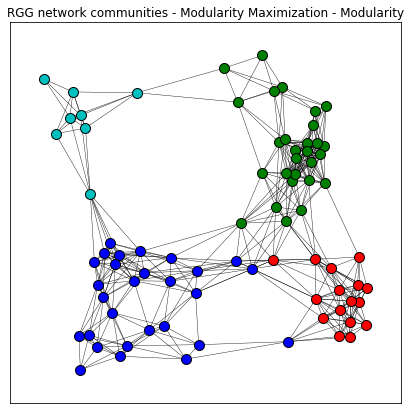

Network:		RGG
Partition Type:		Modularity Maximization
Modularity:		0.5853728395061728
Performance:		0.8291139240506329
Number of Communities:	4


In [39]:
visualization(RGG, RGG_mm, 'RGG', 'Modularity Maximization', 'Modularity', pos)

##### Σχόλιο:
Παρατηρούμε πως για την τοπολογία RGG  οι επιδόσεις είναι αρκετά ικανοποιητικές. Εποπτικά, όλες οι μέθοδοι φαίνεται να έχουν καλά αποτελέσματα. Για την καλή επίδοση στον διαχωρισμό σε κοινότητες ευθύνεται ο τρόπος κατασκευής του γράφου. Πιο συγκεκριμένα, τοποθετούνται οι κόμβοι τυχαία στον χώρο και έπειτα συνδέονται με βάση της απόστασή τους από τους υπόλοιπους λαμβάνοντας υπόψη την παραμέτρο ακτίνας R. Επομένως, οι κόμβοι που βρίσκονται χωρικά κοντά μεταξύ τους αποτελούν μία διακριτή κοινότητα.

#### Οπτικοποίηση κοινοτήτων SW

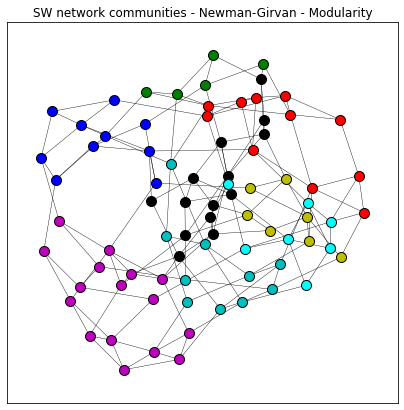

Network:		SW
Partition Type:		Newman-Girvan
Modularity:		0.5741015625
Performance:		0.8930379746835443
Number of Communities:	8
-----------------------------------------------------------------


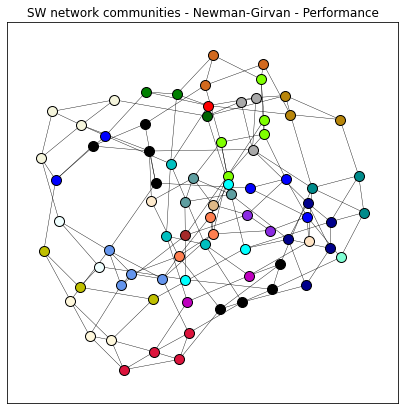

Network:		SW
Partition Type:		Newman-Girvan
Modularity:		0.4018749999999999
Performance:		0.9670886075949368
Number of Communities:	31


In [40]:
pos = nx.spring_layout(SW)
visualization(SW, SW_ng_mod, 'SW', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(SW, SW_ng_perf, 'SW', 'Newman-Girvan', 'Performance', pos)

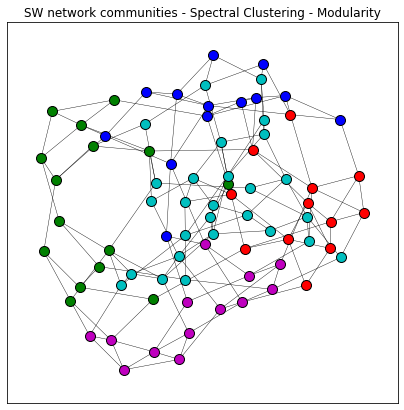

Network:		SW
Partition Type:		Spectral Clustering
Modularity:		0.48638671875000006
Performance:		0.8069620253164557
Number of Communities:	5
-----------------------------------------------------------------


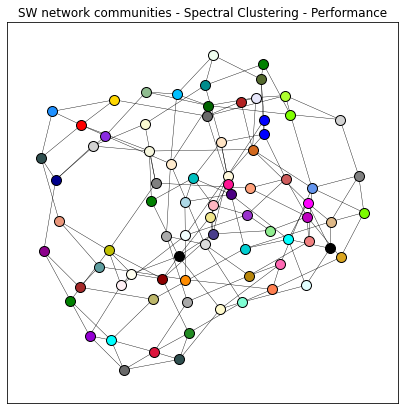

Network:		SW
Partition Type:		Spectral Clustering
Modularity:		-0.013300781250000001
Performance:		0.9490506329113924
Number of Communities:	79


In [41]:
visualization(SW, SW_sc_mod, 'SW', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(SW, SW_sc_perf, 'SW', 'Spectral Clustering', 'Performance', pos)

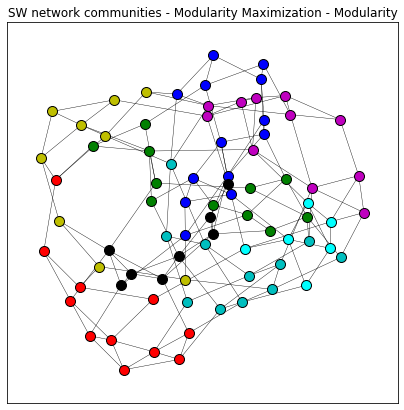

Network:		SW
Partition Type:		Modularity Maximization
Modularity:		0.563203125
Performance:		0.9003164556962026
Number of Communities:	8


In [42]:
visualization(SW, SW_mm, 'SW', 'Modularity Maximization', 'Modularity', pos)

##### Σχόλιο:
Παρατηρούμε ότι στην τοπολογία SW, η επίδοση του Spectral Clustering υπερτερεί σε σχέση με τις άλλες 2 μεθόδους. Επίσης, για τα partitions με το μεγαλύτερο performace παρατηρούμε πως το modularity score είναι σημαντικά μικρό και ο αριθμός των κοινοτήτων τείνει στον αριθμό των κόμβων του δικτύου. Για τα υπόλοιπα partitions, ωστόσο, οι κοινότητες είναι ορατές. Σε ένα δίκτυο SW περιμένουμε να σχηματιστούν κοινότητες γύρω από τους nodes hubs (μεγάλου βαθμού κόμβοι),όπως και συμβαίνει. 

#### Οπτικοποίηση κοινοτήτων SF

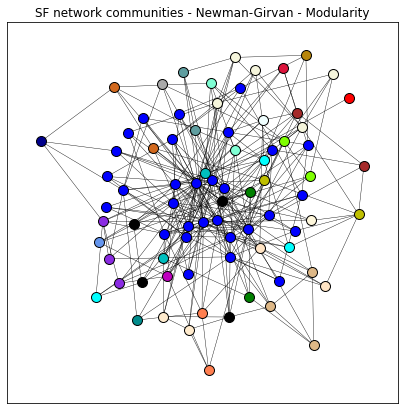

Network:		SF
Partition Type:		Newman-Girvan
Modularity:		0.13638331024930742
Performance:		0.8468354430379746
Number of Communities:	30
-----------------------------------------------------------------


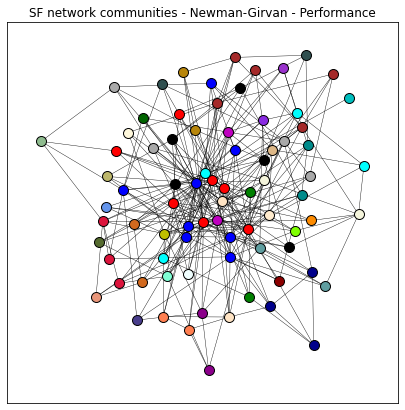

Network:		SF
Partition Type:		Newman-Girvan
Modularity:		0.11511534799168983
Performance:		0.9174050632911392
Number of Communities:	43


In [43]:
pos = nx.spring_layout(SF)
visualization(SF, SF_ng_mod, 'SF', 'Newman-Girvan', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(SF, SF_ng_perf, 'SF', 'Newman-Girvan', 'Performance', pos)

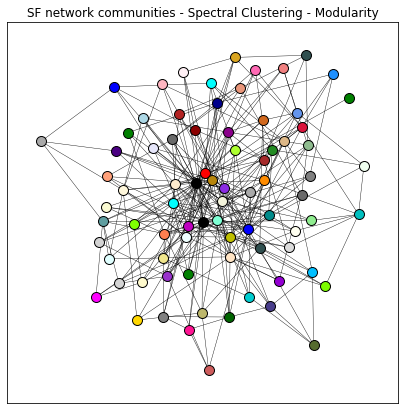

Network:		SF
Partition Type:		Spectral Clustering
Modularity:		-0.019747662742382262
Performance:		0.9034810126582279
Number of Communities:	79
-----------------------------------------------------------------


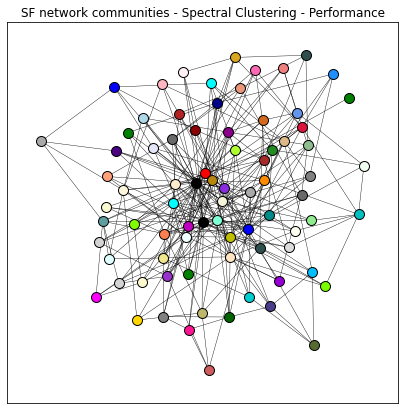

Network:		SF
Partition Type:		Spectral Clustering
Modularity:		-0.019747662742382262
Performance:		0.9034810126582279
Number of Communities:	79


In [44]:
visualization(SF, SF_sc_mod, 'SF', 'Spectral Clustering', 'Modularity', pos)
print('-----------------------------------------------------------------')
visualization(SF, SF_sc_perf, 'SF', 'Spectral Clustering', 'Performance', pos)

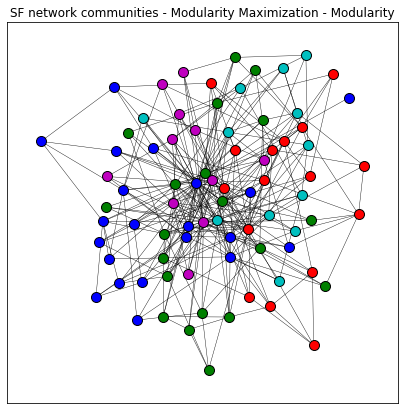

Network:		SF
Partition Type:		Modularity Maximization
Modularity:		0.27000194771468145
Performance:		0.7939873417721519
Number of Communities:	5


In [45]:
visualization(SF, SF_mm, 'SF', 'Modularity Maximization', 'Modularity', pos)

##### Σχόλιο:
Παρατηρούμε πως στην τοπολογία SF οι επιδόσεις και των 3 μεθόδων είναι χαμηλές σε σχέση με αυτές των προηγούμενων συνθετικών τοπολογιών, κυρίως λόγω του χαμηλού modularity score. Πιο συγκεκριμένα, στις 2 πρώτες μεθόδους, είχαμε ως αποτέλεσμα αρκετά μεγάλο αριθμό κοινοτήτων, ενώ με την μέθοδο του Modularity Maximazation είχαμε συνολικό αριθμό κοινοτήτων 5, που είναι κοντά στην παράμετρο m=4 (το πλήθος των ακμών σύνδεσης του νέου κόμβου με παλιούς, κατά προτίμηση αυτούς με τον μεγαλύτερο βαθμό) της συνάρτησης κατασκευής του SF δικτύου. Δηλαδή μπορούμε να υποθέσουμε πως έχουμε περίπου 4 μεγάλα hubs και άρα 4 μεγάλες κοινότητες.

#### Σύγκριση χρόνων αλγορίθμων

In [46]:
for timestamp in timestamps:
    timestamps[timestamp] = round(timestamps[timestamp], 1)
    print(timestamp + ':' + str(timestamps[timestamp]) + '\tsec')

football_mm	:0.0	sec
got_mm		:0.0	sec
eu1_mm		:3.3	sec
football_ng	:4.9	sec
got_ng		:1.7	sec
eu1_ng		:409.6	sec
football_sc	:46.8	sec
got_sc		:52.3	sec
eu_mm		:2.9	sec
eu_ng		:407.3	sec


Συγκρίνοντας εποπτικά όλα τα αποτελέσματα, η καλύτερη μέθοδος είναι εμφανώς η άπληστη Modularity Maximazation. Χρονικά είναι πολύ αποδοτικότερη και τις περισσότερες φορές έχει πολύ υψηλό μέσο score.